In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [138]:
from sb3_contrib import RecurrentPPO

In [ ]:
BASE_PATH = '../../best_model'

In [139]:
model = RecurrentPPO.load(f'{BASE_PATH}/recurrentppo/CnnLstmPolicy/best_model.zip')
# model = RecurrentPPO.load('../output_models/recurrentppo/MlpLstmPolicy/2022-06-14_22_27_08_9.zip')
X = np.load(f'{BASE_PATH}/recurrentppo/CnnLstmPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([5769, 1, 1, 15, 7])

In [140]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

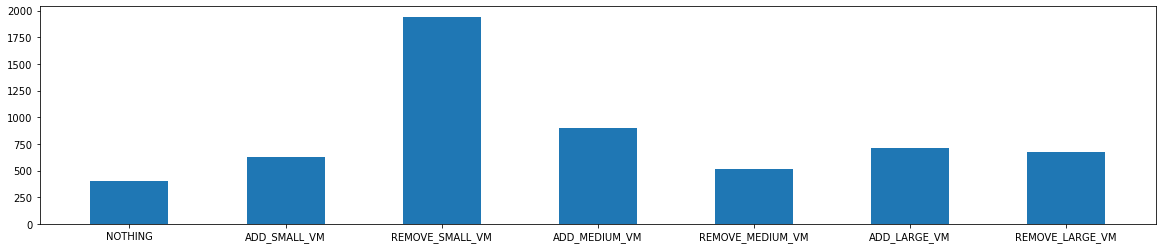

In [141]:
plot_action_histogram(predictions)

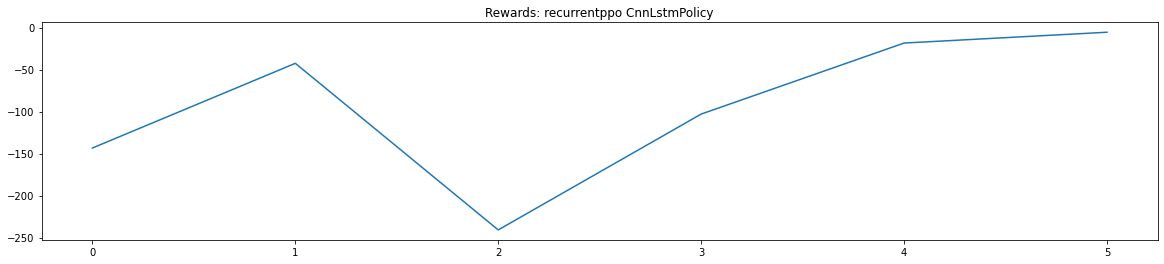

In [142]:
plot_training_data(f'{BASE_PATH}/recurrentppo/CnnLstmPolicy/training_data.csv', data_type='reward', title='recurrentppo CnnLstmPolicy')

In [168]:
from ppo_policy import RecurrentPPOCnnPolicy, RNNStates
ppo_net = RecurrentPPOCnnPolicy(model.observation_space, model.action_space, model.lr_schedule, model)

In [169]:
ppo_net.lstm_hidden_state_shape

(1, 1, 256)

In [170]:
x = torch.tensor(X[0])
# x = torch.tensor(X)
ppo_net.forward(
            x, 
            lstm_states=RNNStates(
                pi=(torch.zeros(ppo_net.lstm_hidden_state_shape), torch.zeros(ppo_net.lstm_hidden_state_shape)), 
                vf=(torch.zeros(ppo_net.lstm_hidden_state_shape), torch.zeros(ppo_net.lstm_hidden_state_shape))),
            episode_starts=torch.zeros(0))

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([-1.1170], grad_fn=<SqueezeBackward1>)

In [171]:
x = torch.tensor(X[1])
ppo_net.predict(x)[0][0]

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


3

In [173]:
N = 50
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]

X_sample = X[0:2*(N+0)]
predictions_sample = predictions[0:2*(N+0)]

ig_attributor = IGAttributor(net=ppo_net,
                            policy='cnn',
                            agent='ppo',
                            data=X_sample,
                            predictions=predictions_sample,
                            forward_args=(RNNStates(
                    pi=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256)), 
                    vf=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256))),
                    torch.zeros(0)))

Action made: REMOVE_SMALL_VM


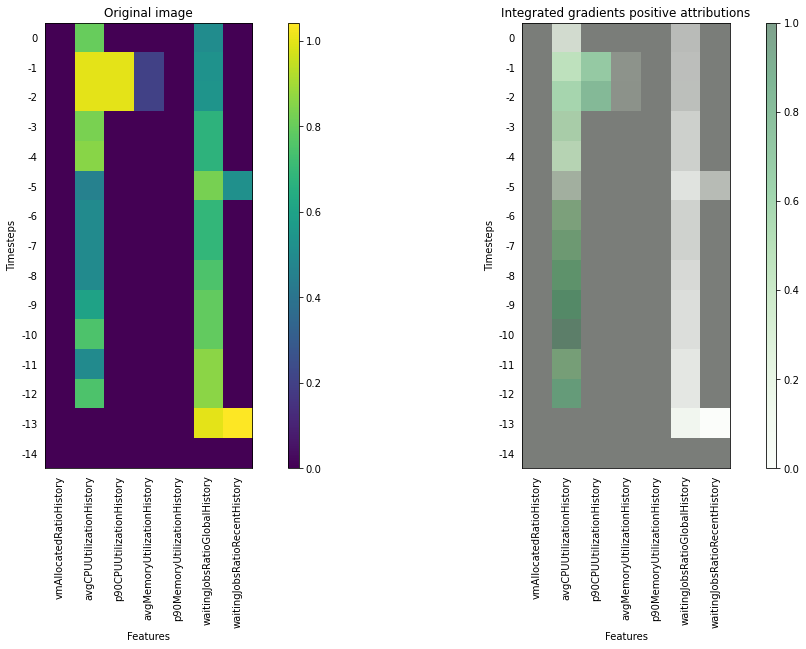

In [124]:
ig_attributor.explain_example(14)

Action made: REMOVE_SMALL_VM


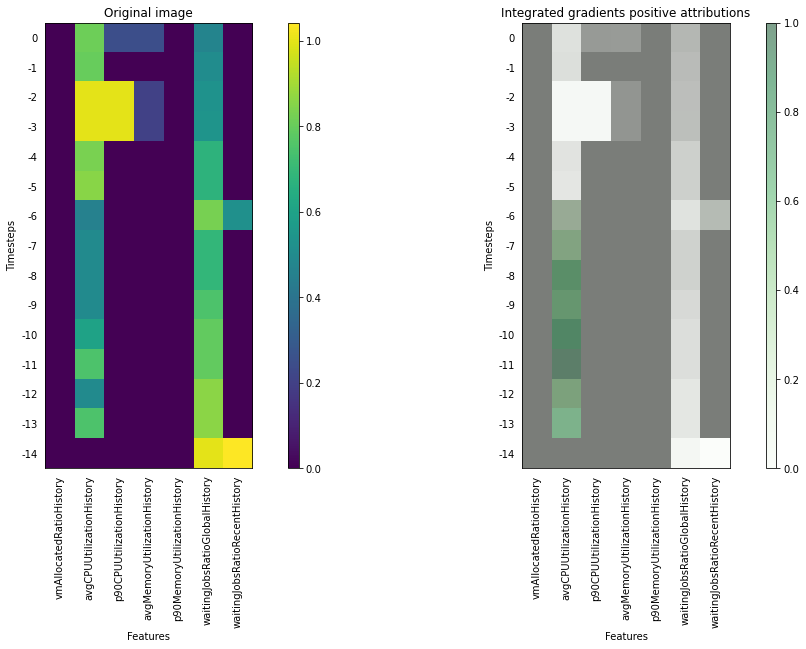

In [125]:
ig_attributor.explain_example(15)

Action made: REMOVE_MEDIUM_VM
tensor(0.) tensor(1.)


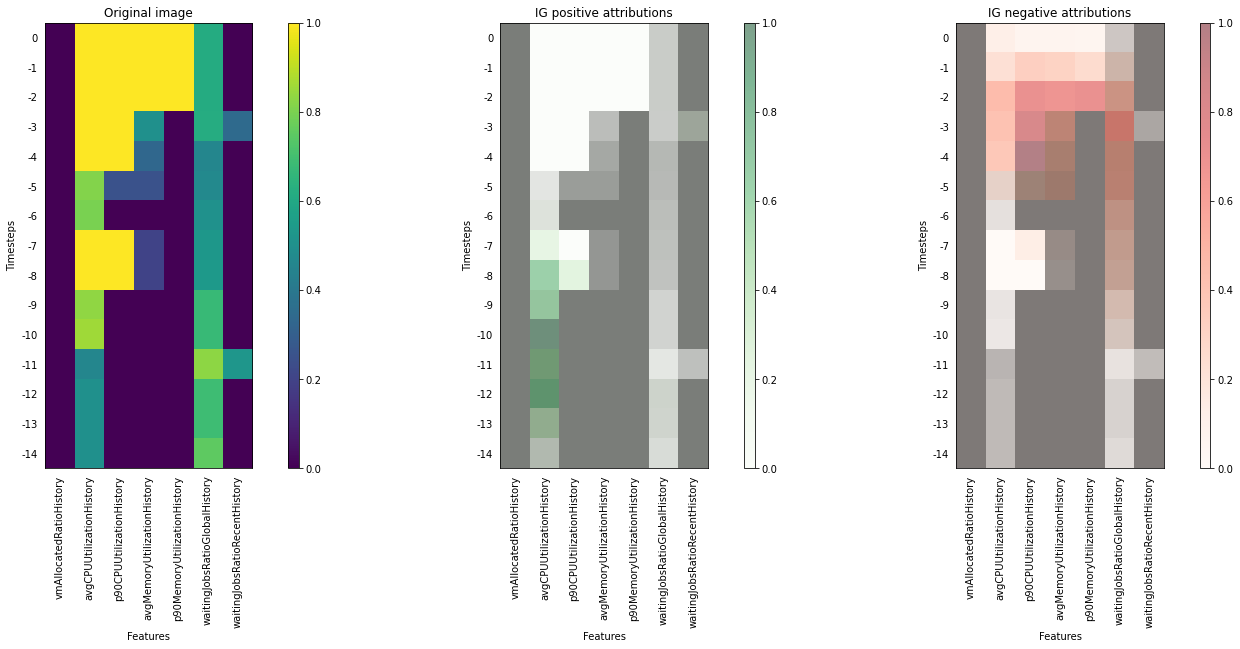

In [126]:
ig_attributor.explain_example(20)

In [136]:
ig_attributor.explain_example(30)

IndexError: index 30 is out of bounds for dimension 0 with size 1

Action made: REMOVE_SMALL_VM


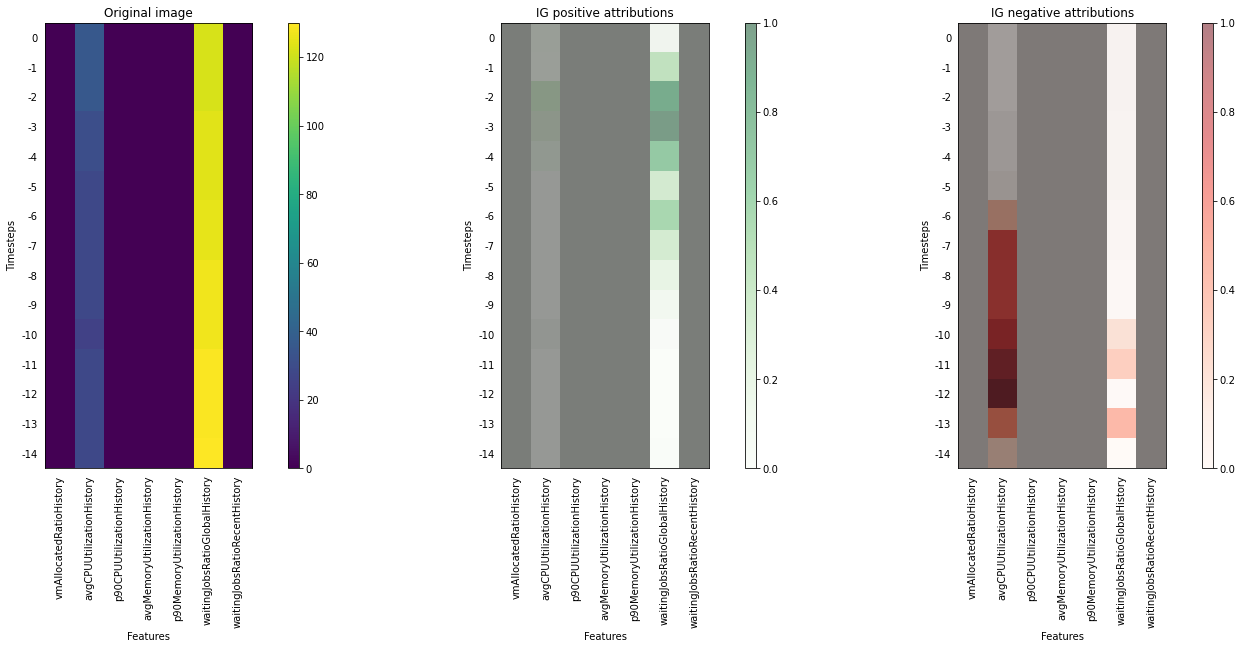

In [130]:
ig_attributor.explain_example(80)

In [104]:
action_observation_map = get_action_observation_map(predictions)

{'ADD_LARGE_VM': 686,
 'ADD_MEDIUM_VM': 886,
 'ADD_SMALL_VM': 636,
 'NOTHING': 423,
 'REMOVE_LARGE_VM': 717,
 'REMOVE_MEDIUM_VM': 520,
 'REMOVE_SMALL_VM': 1901}


In [105]:
idx = action_observation_map['REMOVE_LARGE_VM'].squeeze(1)[:500]

In [106]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='cnn',
                            agent='ppo',
                            data=X[idx],
                            predictions=predictions[idx],
                            forward_args=(RNNStates(
                    pi=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256)), 
                    vf=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256))),
                    torch.zeros(0)))

Action made: REMOVE_LARGE_VM


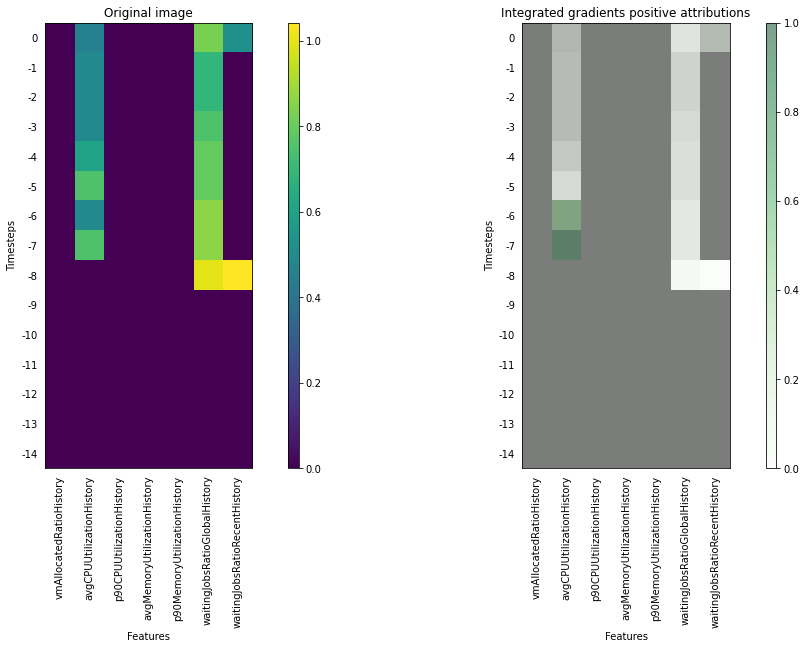

In [107]:
ig_attributor.explain_example(idx=0)

In [132]:
X_manual = torch.Tensor([[[
    [[0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1]],
    # [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    # [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ]]])

predictions_manual = []
for _ in X_manual:
    predictions_manual.append(model.predict(X_manual[0])[0][0])
predictions_manual = np.array(predictions_manual)

In [133]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='cnn',
                            agent='ppo',
                            data=X_manual,
                            predictions=predictions_manual,
                            forward_args=(RNNStates(
                    pi=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256)), 
                    vf=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256))),
                    torch.zeros(0)))

Action made: ADD_LARGE_VM


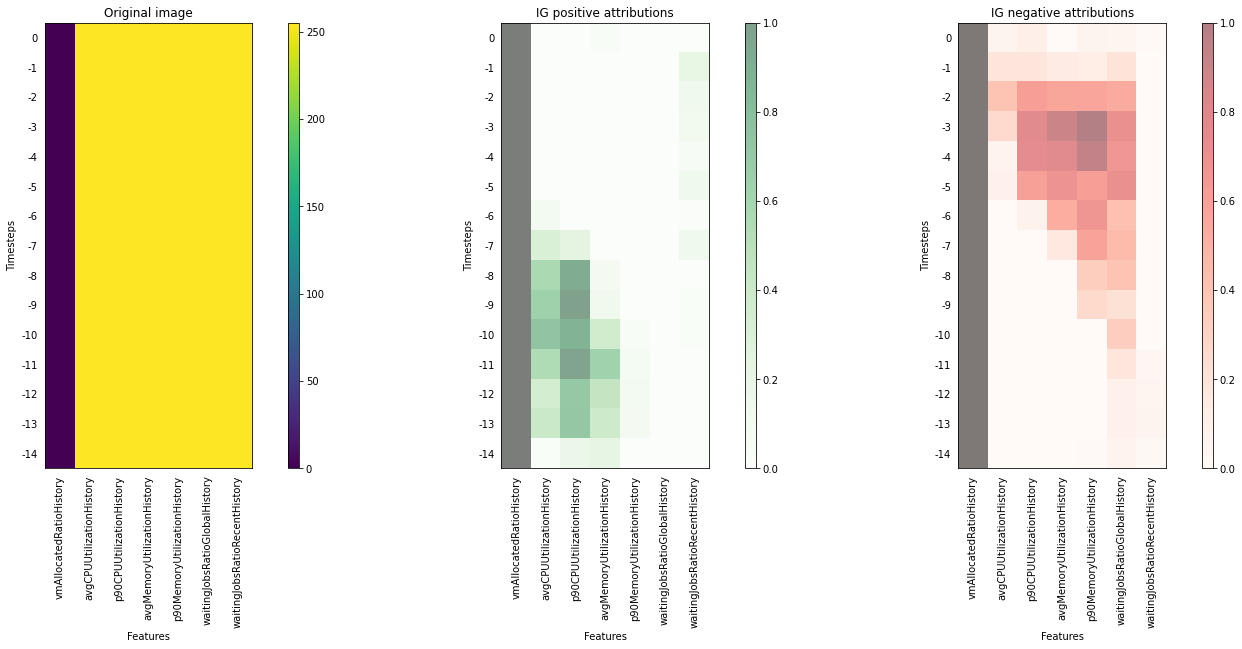

In [134]:
ig_attributor.explain_example(idx=0)

In [135]:
X.shape

torch.Size([5769, 1, 1, 15, 7])

In [ ]:
np.argwhere(X == i)